In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [4]:
# Load the dataset into a datafram object
attrition = pd.read_csv('~/Desktop/Bayesian/IBM_Employee/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
attrition.head(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


We see that our target column with which we can point our model to train on would be the "Attrition" column.
We also have a mix of numerical and categorical columns. We will handle their numerical encoding in the next section

In [6]:
attrition.shape


(1470, 35)

We have a total of 1470 data, and 35 columns.
As one is our target, we see that we have 34 covariates.

#### Data quality checks

We want to see if there are nulls or infinite values in the data. To look for any null values, we can invoke the $\textbf{isnull}$ function.

In [7]:
# Looking for NaN

display(attrition.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

#### Distribution of the dataset

We want to have a rough idea of how the features are distributed with one another. To do so, we will use the $\textbf{kdeplot}$ from the Seaborn plotting libreary. This will generate bivariate plots.

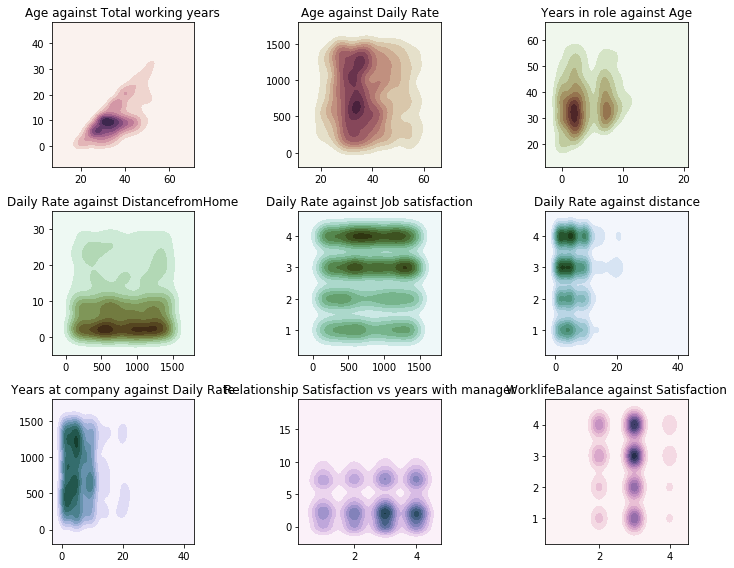

In [8]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsInCurrentRole'].values
y = attrition['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['RelationshipSatisfaction'].values
y = attrition['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()

In [9]:
# Define a dictionary for the target mapping
target_map ={'Yes':1, 'No':0}

# Use the pandas apply method to numerically encode our attrition target variable
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x : target_map[x])

In [10]:
attrition.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,80,3,12,3,2,1,0,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,80,1,1,2,3,1,0,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,80,0,10,2,3,9,7,1,8,0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,80,2,17,3,2,7,7,7,7,0


We see that we have successfully added a categorical variable to our dataframe. This will be our target variable, i.e. the one we want to do inference on.

#### Correlation of Features

We will look at the correlation matrix, and thus have an overview of how the feaures are relataed to one another. We can use the $\textbf{.cor}$ method of the Pandas dataframe which by default provides the Pearson Correlation values of the columns pairwiseoin that dataframe.

We will use he Plotly library to produce an interactive Pearson correlation matrix via the Heatmap matrix.

In [11]:
# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager',u'Attrition_numerical']
data = [
    go.Heatmap(
        z= attrition[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=attrition[numerical].columns.values,
        y=attrition[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

We can see that quite a lot of our columns seem to be poorly correlated with one another. This is preferable so that we don't need to deal with redundant features when training our model. (Otherwise could use PCA)

#### Pairplot Visualisations

Now we create some Seaborn pairplots and set it against the targer variable which is ou Attrition column to get a feel for how the various features are distributed vis-a-vis employee attrition

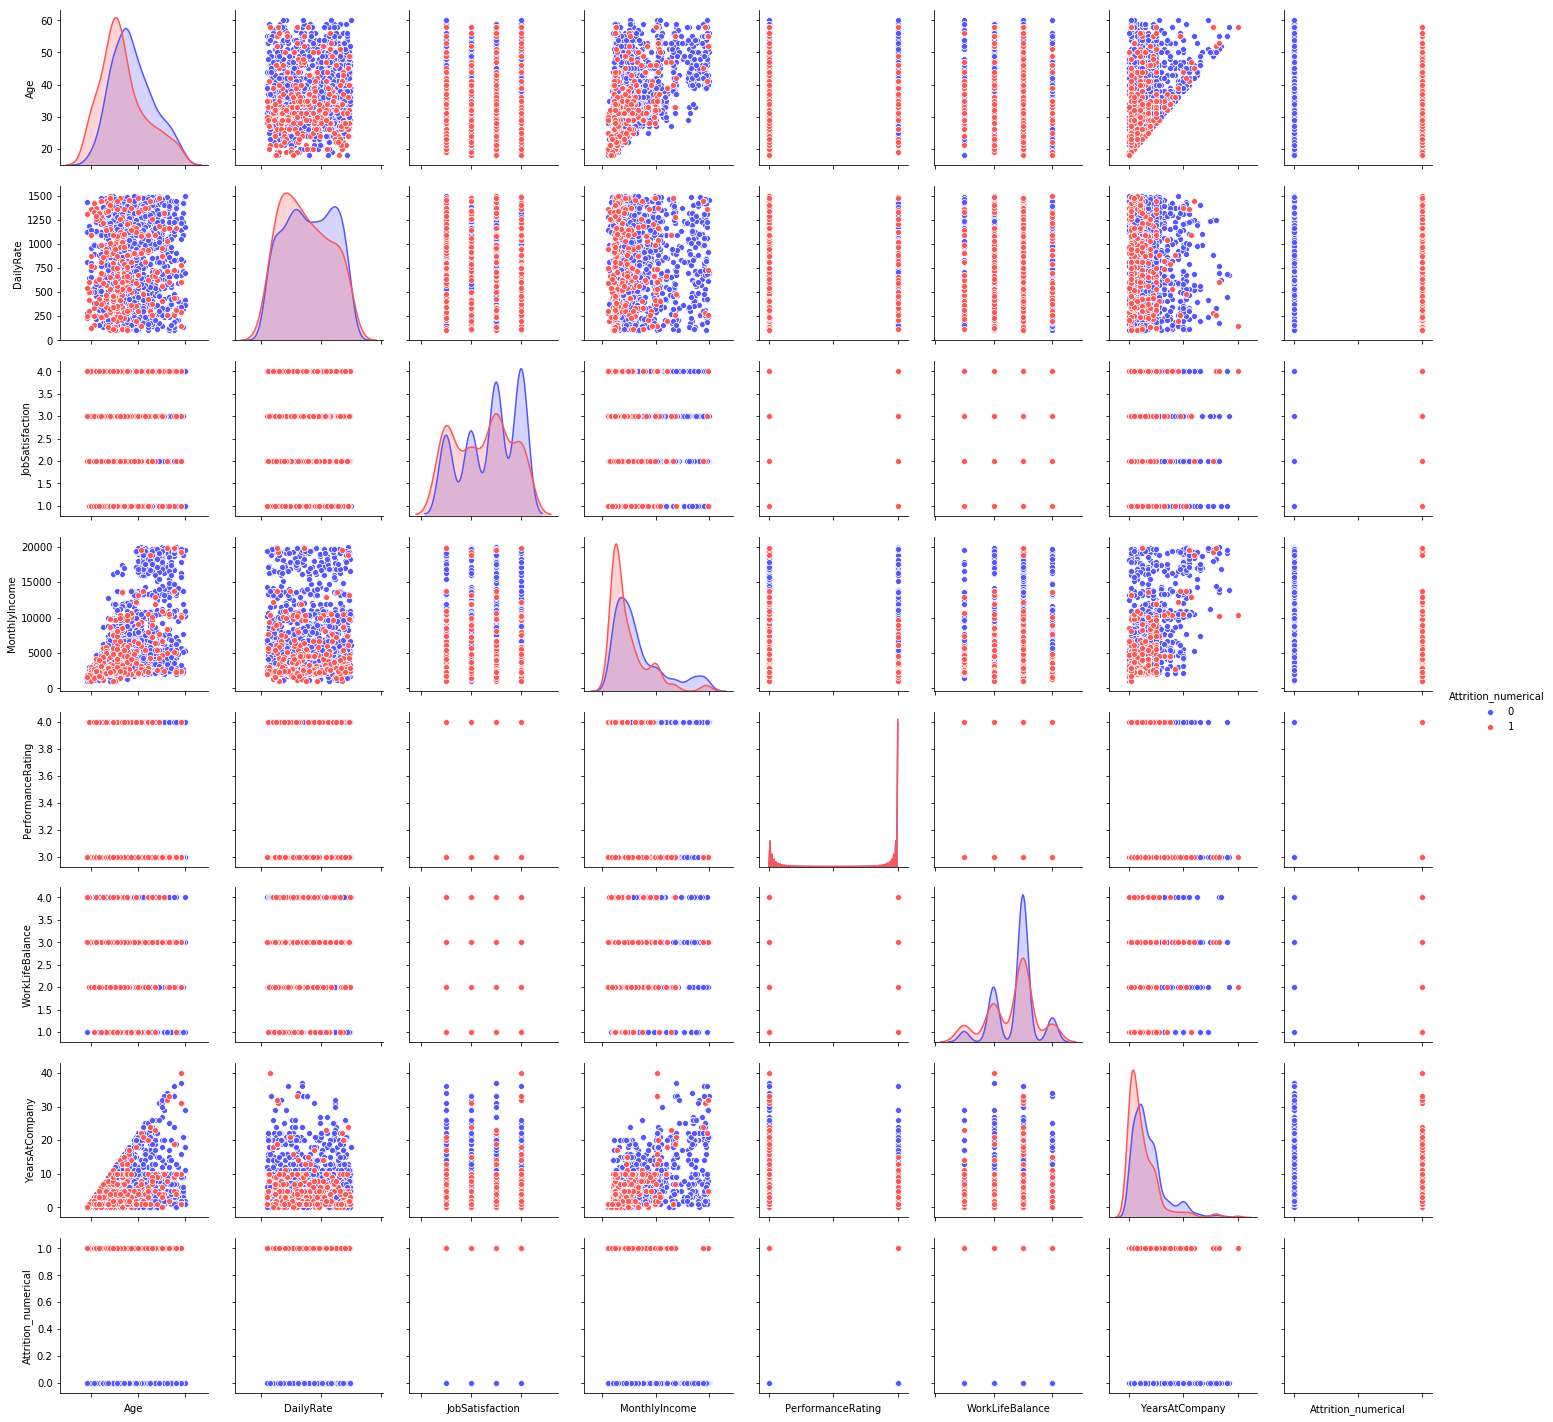

In [12]:
# Refining our list of numerical values
numerical = [u'Age', u'DailyRate', u'JobSatisfaction', u'MonthlyIncome', 
             u'PerformanceRating', u'WorkLifeBalance', u'YearsAtCompany', 
             u'Attrition_numerical']

g=sns.pairplot(attrition[numerical], hue='Attrition_numerical', palette='seismic', diag_kind='kde', diag_kws=dict(shade=True))
g.set(xticklabels=[])

## Categorical encoding

In [13]:
# Drop Attrition_numerical first
attrition = attrition.drop(['Attrition_numerical'], axis=1)

# Empty list to store columns with categorical data
categorical = []
for col, value in attrition.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
        
# Store the numerical columns in a list numerical
numerical = attrition.columns.difference(categorical)

In [14]:
# Store the categorical data in a dataframe called attrition_cat
attrition_cat = attrition[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Droping the target column

# Store the numerical features to a dataframe attrition_num
attrition_num = attrition[numerical]

We now apply the Pandas method $\textbf{get_dummies}$ which creates encoded dummy variables from the categorical variables.

In [15]:
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(5)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [16]:
# Concate the two dataframe together columnwise
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

attrition_final.shape

(1470, 55)

In [17]:
# Final step: generate our target variable
target = attrition['Attrition'].apply(lambda x: target_map[x])
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [18]:
# Plotting the number of Yes and No
data = [go.Bar( x=attrition["Attrition"].value_counts().index.values,
                y=attrition["Attrition"].value_counts().values
              )]

py.iplot(data, filename='yes-and-no')

We see that the number of 'Yes' and 'No' in the target variable is very different. Thus we have an umbalanced dataset. One could try to treat this imbalance via statistical techniques as oversampling (e.g. SMOTE) or undersampling.

## Implementing some models

We will aim to evaluate and contrast the performances of a handful of different learning models

#### Splittind Data into Train and Test sets

To split the dataset we will use sklearn.

In [19]:
# Import the train_test_split_method
from sklearn.model_selection import train_test_split

# Split data into train and test sets as well as for validation
train_set, test_set, target_train, target_val = train_test_split(attrition_final,
                                                                target,
                                                                train_size=0.8)

In [20]:
def getPercent(target):
    percent = {}
    for className in target:
        percent[className] = (target==className).sum()/target.size
    return percent

percent = getPercent(target_train)
percent

{0: 0.8409863945578231, 1: 0.15901360544217688}

We see that in our dataset, we have $84\%$ of satisfaction (No), while we have $16\%$ of attrition (Yes). We will try to encode this information in one of our model through the prior.

### A. First model : uniform prior and bernoulli likelihood

After a first glance at the data, we see that they seem to be generated from a Bernoulli distribution with parameter $p=0.84$.

We will thus choose as a likelihood: 
$$ f(d | p )  = \mathcal{B}(p),$$
i.e. 
$$ f(d | p ) = p^{d} (1-p)^{(1-d)}$$
(recall $d \in \{0,1\}$)

We see that the parameter p is a probabilty. Thus it must be in the interval $[0,1]$. We will code this information in our prior, that will be:
$$ p \sim \mathcal{U}(0,1),$$
i.e. we have
$$ f(p) = \begin{cases} 
1 \quad &\text{if } 0 \le p \le 1, \\
0 \quad &\text{else} 
\end{cases} $$

This prior isn't too restrictive so it gives our model the ability to learn, while at the same time it encodes the restriction we need (namely $p \in [0,1]$).

#### A.1 Metropolis-Hastings

##### Proposal distribution
I will choose a simple one: the normal distribution
$$ p_{\text{proposal}} \sim \mathcal{N}(p_{\text{current}}, 1),$$
i.e. we have
$$ h(p | p_{\text{current}}) = \frac{1}{\sqrt{2 \pi}} \exp{ \left( -\frac{(p-p_{\text{current}})^{2}}{2} \right)}. $$

##### Likelihood of the data

For each data point $d_i$ in the data set $D$, we choose:

$$ f(d_i | p) = p^{d_i}(1-p)^{(1-d_i)}. $$

Moreover we suppose the data to be independent, so the likelihood of the data $D$ is:

$$ f(D | p) = \prod_{i=1}^{N} f(d_i | p) = p^{\sum_{i=1}^{N}d_i} (1-p)^{N-\sum_{i=1}^{N}d_i}.$$

And the log-likelihood is: 

$$ log f(D |p) = \log{\frac{p}{1-p}} \sum_{i=1}^{N} d_i + N \log{(1-p)} $$

##### Metropolis acceptance ratio
The acceptance ratio for the Metropolis-Hastings algorithm is defined as

$$A := \frac{ f(p_{\text{proposal}} | D) \; h(p_{current} | p_{\text{proposal}})}{ f(p_{\text{current}} | D) \; h(p_{\text{proposal}} | p_{\text{current}})}. $$

This ration is defined with the normalized posterior of $p$, but since the knowledge of the normalizing constant is not needed, this ratio can be rewritten with the unnormalized posterior.
Henceforth we will denote the unnormalized posterior of $p$ as $f(p|D)$. 

We will always accept $p_{\text{proposal}}$ if this one increases the probability, i.e. if 

$$ A \ge 1. $$

Moreover, we know that this unnormalized posterior is equal to

$$ f(p|D) = f(D|p)f(p). $$

The condition of acceptance becomes

$$
    f(D |p_{p}) \; f(p_{p}) \; h(p_{c} |p_{p}) \ge f( D | p_{c}) \; f(p_{c}) \; h(p_{p} | p_{c})
$$



However, here we have a $\textbf{symmetric}$ proposal distribution (i.e. $h(p_{p}|p_{c})=h(p_{c}|p_{p}))$. Thus the acceptance ratio along with the condition of acceptance become

$$ 
    A = \frac{ f(p_{p} | D)}{f(p_{c}|D)}, 
$$

and

$$
    f(D |p_{p}) \; f(p_{p}) \; \ge \; f( D | p_{c}) \; f(p_{c}) 
$$

##### Using the log-likelihood: 

We can rewrite this condition as

$$ 
    \log f(D | p_{p}) \; + \; \log f(p_{p}) \; \ge \; \log f(D | p_{c}) \; + \; \log f(p_{c}),
$$

Since our prior in uniform in $[0,1]$, the prior (mass function) is so that

$$ f(p) = 1, \qquad \forall p \in [0,1]$$

and the condition (for valid parameters) becomes

$$  \log f(D | p_{p}) \; \ge \; \log f(D|p_{c}) $$

Now, using the exact form of the likelihood derived above, we arrive at

$$
    \log{\frac{p_{p}}{1-p_{p}}} \sum_{i=1}^{N} d_i + N \log{(1-p_{p})} \; \ge \; \log {\frac{p_{c}}{1-p_{c}}} \sum_{i=1}^{N} d_i + N \log{(1-p_{c})}
$$

Using the log enables us to deal with really small values (values near $0$) that might cause overflow. With the log, they become really big (negative) values and we don't have this problem.

#### Implementation of the Metropolis-Hastings algorithm

In [21]:
from scipy.stats import bernoulli

In [44]:
# Metropolis-Hastings algorithm with symmetric transition
def metropolis_hastings(likelihood, prior, transition, param_init, iterations, data, acceptance_rule):
    # likelihood(x,data) = function that calculates the likelihood of data given x
    # prior(x) = prior density of the param x
    # tansition(x) = function that draws a sample from a distribution and returns it
    # param_init = a starting sample
    # iterations = number of iterations to perform
    # data = the data we wish to model
    # acceptance(x_new,x) = decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []
    for i in range(iterations):
        x_new = transition(x)
        x_lik = likelihood(x,data)
        x_new_lik = likelihood(x_new,data)
        if acceptance(x_new_lik * prior(x_new), x_lik * prior(x)):  #we consider a symmetric transition here, so simple acceptance rule
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)
            
    return np.array(accepted), np.array(rejected)

In [112]:
# Transition density : how to move from p_current to p_new
transition_normal = lambda p: np.random.normal(p, 1)

# Computes the likelihood of the data given a p, i.e. the likelihood
# that these data were generated by a B(p).
def log_like_bernoulli(p,data):
    return np.log(p / (1-p)) * np.sum(data) + data.size * np.log(1-p)

# prior is a U(0,1)
def prior_unif(p):
    return 1

# Defines whether to accept or reject the new sample
def acceptance(x_new,x):
    if x_new >= x:
        return True
    else:
        accept = np.random.uniform(0,1)
        return accept <= (np.exp(x_new/x))

p0= (1/2)

In [113]:
log_like_bernoulli(0.05, target_train)

-610.9310033038838

In [114]:
target_train.size

1176

In [118]:
accepted, rejected = metropolis_hastings(log_like_bernoulli, prior_unif, transition_normal, 0.5, 50000, target_train, acceptance)

In [119]:
accepted.size

18398

In [120]:
rejected.size

31602

In [124]:
accepted[-10:]

array([0.9729068 , 0.33306216, 0.68242529, 0.95192421, 0.57444663,
       0.42812411, 0.98044105, 0.38018755, 0.11582662, 0.93962862])

In [125]:
print(accepted.shape)

(18398,)


(18398,)

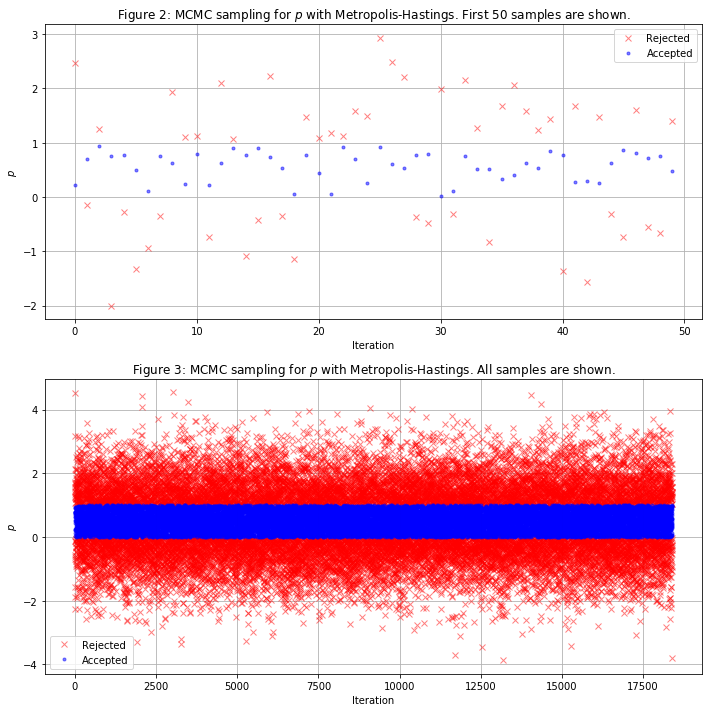

In [127]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$p$")
ax.set_title("Figure 2: MCMC sampling for $p$ with Metropolis-Hastings. First 50 samples are shown.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
to_show=-accepted.shape[0]
ax2.plot( rejected[to_show:], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[to_show:], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$p$")
ax2.set_title("Figure 3: MCMC sampling for $p$ with Metropolis-Hastings. All samples are shown.")
ax2.grid()
ax2.legend()



fig.tight_layout()
accepted.shape

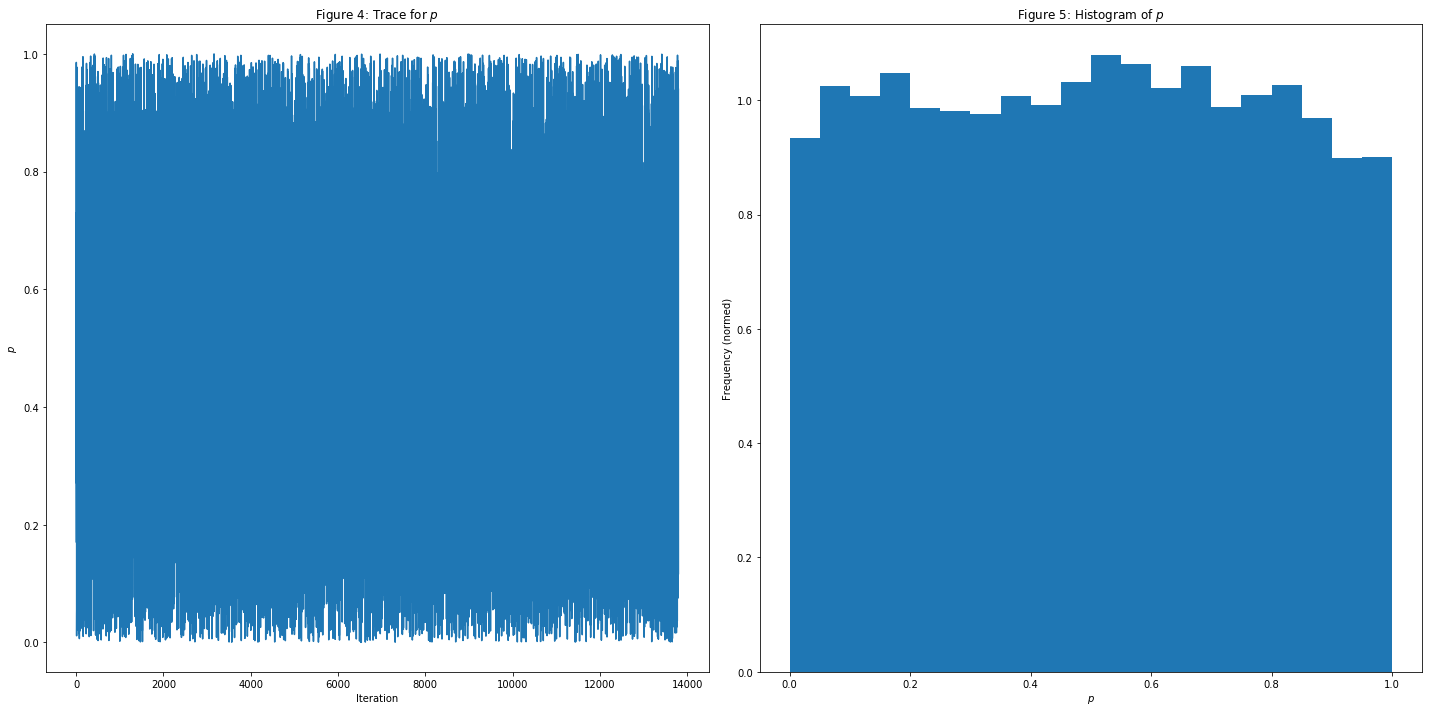

In [129]:
# Trace of p and histogram of the trace

show=int(-0.75*accepted.shape[0])
hist_show=int(-0.75*accepted.shape[0])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:])
ax.set_title("Figure 4: Trace for $p$")
ax.set_ylabel("$p$")
ax.set_xlabel("Iteration")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:], bins=20,density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("$p$")
ax.set_title("Figure 5: Histogram of $p$")
fig.tight_layout()


ax.grid("off")